# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Set pathways for study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice. Use .nunique() to count unique values in the "Mouse ID" column
combined_data["Mouse ID"].nunique()

249

In [5]:
# Practicing the different Pandas commands for looking at data frames structure and values
combined_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [6]:
combined_data[['Mouse ID', 'Drug Regimen', 'Age_months']]

,Mouse ID,Drug Regimen,Age_months
0,k403,Ramicane,21
1,k403,Ramicane,21
2,k403,Ramicane,21
3,k403,Ramicane,21
4,k403,Ramicane,21
...,...,...,...
1888,z969,Naftisol,9
1889,z969,Naftisol,9
1890,z969,Naftisol,9
1891,z969,Naftisol,9


In [7]:
# Counting total number of entries in Mouse ID column
combined_data["Mouse ID"].count()

1893

In [8]:
# Getting each Mouse ID without displaying duplicates
combined_data["Mouse ID"].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [9]:
# Do the same as above, but display the unique values in a single-column list
# combined_data["Mouse ID"].unique().tolist()

In [10]:
# Rename Age_months column to match the rest of the columns' formatting
combined_data = combined_data.rename(columns={"Age_months":"Age Months"})

# Display new dataframe with corrected column format
combined_data

,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Making a new column for age of mice in years, using combined_data["Age Months"]/12
combined_data["Age Years"] = combined_data["Age Months"]/12

In [12]:
# Trying to re-order column names
recombined_data = combined_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age Years", "Age Months", "Weight (g)"]]
recombined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age Years,Age Months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,1.75,21,16
1,k403,5,38.825898,0,Ramicane,Male,1.75,21,16
2,k403,10,35.014271,1,Ramicane,Male,1.75,21,16
3,k403,15,34.223992,1,Ramicane,Male,1.75,21,16
4,k403,20,32.997729,1,Ramicane,Male,1.75,21,16
...,...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,0.75,9,30
1889,z969,30,65.841013,3,Naftisol,Male,0.75,9,30
1890,z969,35,69.176246,4,Naftisol,Male,0.75,9,30
1891,z969,40,70.314904,4,Naftisol,Male,0.75,9,30


In [13]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Find mice by ID number with duplicate Timepoints...How about .loc?
duplicateRows = recombined_data[recombined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age Years,Age Months,Weight (g)
909,g989,0,45.000000,0,Propriva,Female,1.75,21,26
911,g989,5,47.570392,0,Propriva,Female,1.75,21,26
913,g989,10,49.880528,0,Propriva,Female,1.75,21,26
915,g989,15,53.442020,0,Propriva,Female,1.75,21,26
917,g989,20,54.657650,1,Propriva,Female,1.75,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by Mouse ID and Timepoint
recombined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
recombined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age Years,Age Months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,1.75,21,16
1,k403,5,38.825898,0,Ramicane,Male,1.75,21,16
2,k403,10,35.014271,1,Ramicane,Male,1.75,21,16
3,k403,15,34.223992,1,Ramicane,Male,1.75,21,16
4,k403,20,32.997729,1,Ramicane,Male,1.75,21,16
...,...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,0.75,9,30
1889,z969,30,65.841013,3,Naftisol,Male,0.75,9,30
1890,z969,35,69.176246,4,Naftisol,Male,0.75,9,30
1891,z969,40,70.314904,4,Naftisol,Male,0.75,9,30


In [19]:
# Checking the number of unique Mouse ID in the cleaned DataFrame.
Total_mice = recombined_data['Mouse ID'].nunique()
print(f"Total mice in study: {Total_mice}")

Total mice in study: 249


## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_mean = recombined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

drug_median = recombined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

drug_var = recombined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

drug_std = recombined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

drug_sem = recombined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.
stat_summary = pd.DataFrame({"Mean": drug_mean, "Median": drug_median, "Variance": drug_var, "Standard Deviation": drug_std, "SEM": drug_sem})
stat_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

stat_summary_2 = recombined_data.groupby(["Drug Regimen"])
stat_summary_agg = stat_summary_2["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename column titles
stat_summary_agg = stat_summary_agg.rename(columns={"mean":"Mean", "median":"Median", "var":"Variance", "std":"Standard Deviation", 
                                            "sem":"SEM"})

# Using the aggregation method, produce the same summary statistics in a single line
stat_summary_agg


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Timepoints')

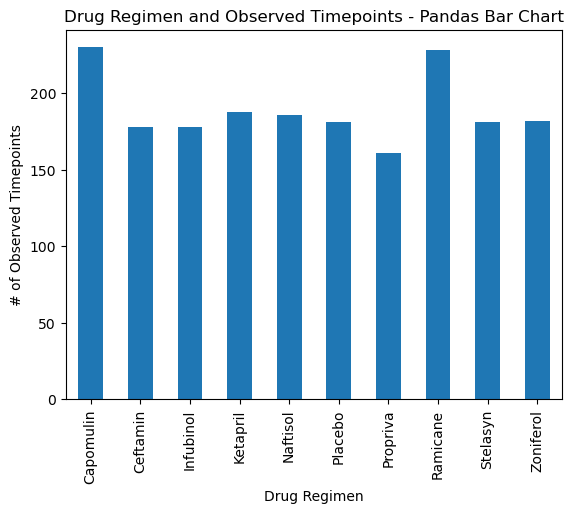

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# DataFrame.plot.bar(x=None, y=None, **kwargs)
# Collect total rows of Mouse ID and Timepoints to count up total number of individual mouse observations
mouse_time_count = recombined_data.groupby("Drug Regimen")["Mouse ID"].count()
#mouse_time_count
# Display that plot!
mouse_time_count.plot.bar(x="Drug Regimen", y="mouse_time_count")
plt.title("Drug Regimen and Observed Timepoints - Pandas Bar Chart")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")

In [78]:
# Declare the data for x-axis and y-axis
drugs = recombined_data['Drug Regimen'].unique()

mouse_times = recombined_data.groupby("Drug Regimen")["Mouse ID"].count()

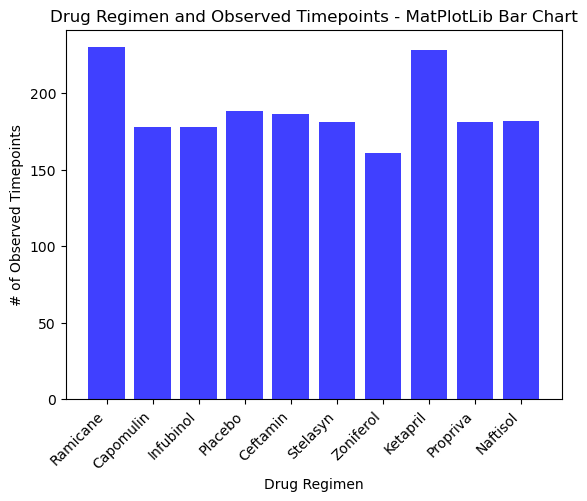

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# set up the chart
x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Drug Regimen and Observed Timepoints - MatPlotLib Bar Chart")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")

plt.bar(x_axis, mouse_times, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation=45, ha="right")
plt.show()

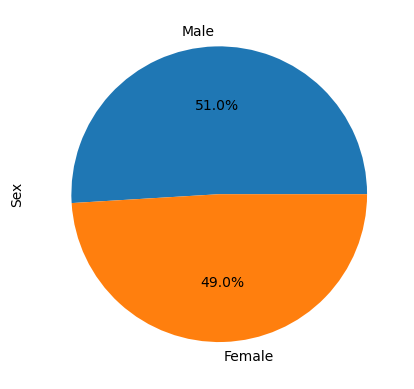

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [95]:
# Collect the data for the pie plots
mice_sex = recombined_data["Sex"].value_counts()
mice_sex

Sex
Male      958
Female    935
Name: count, dtype: int64

## Continue here

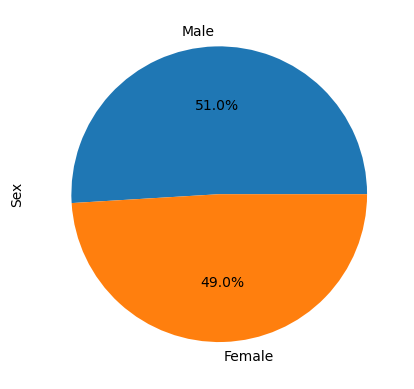

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Male and Female Mice Distribution - pyplot")
#plt.pie(members, explode=explode, labels=gyms, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


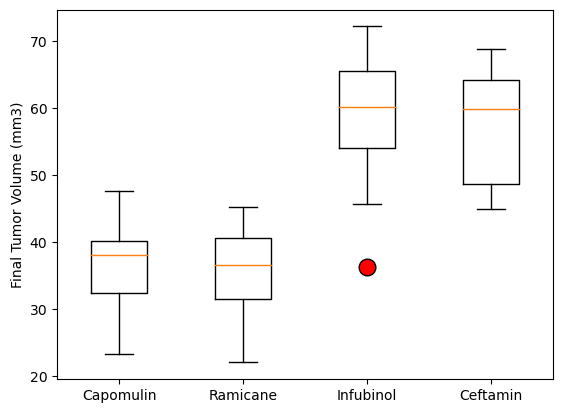

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

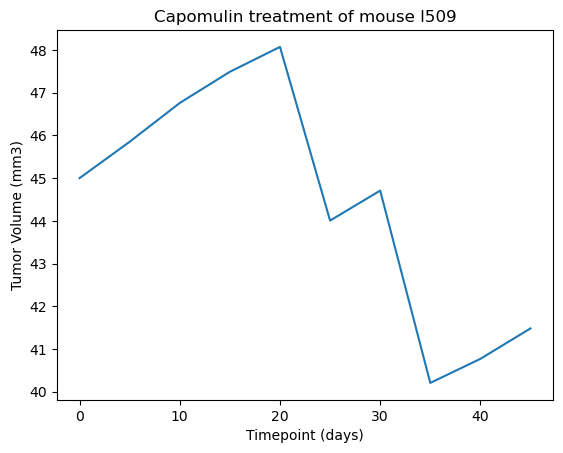

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


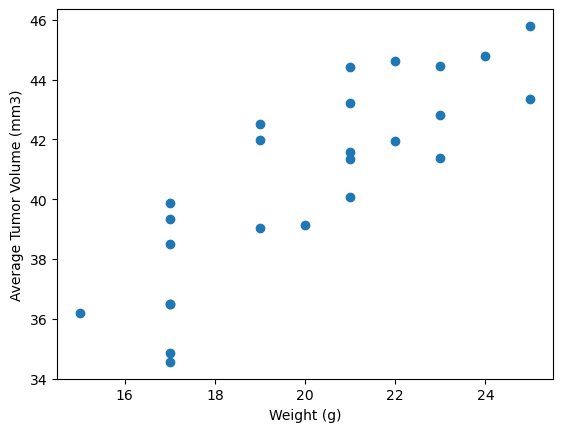

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


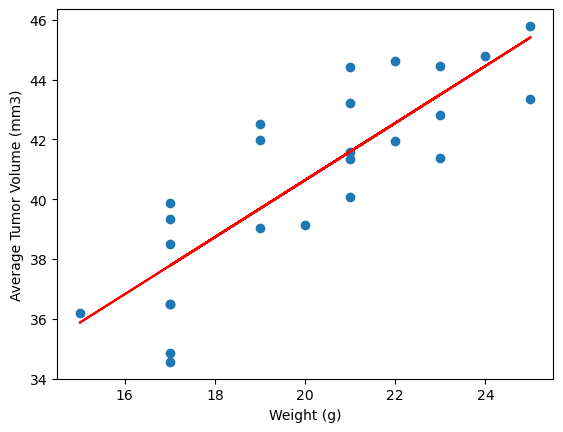

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
